Проект "Аналитика данных HH.ru"

Автор Анна Драмшева  
E-mail: adramsheva@gmail.com   
T: @beadlegger

1. [Описание проекта](#description)  
2. [Загрузка данных, предобработка и подготовка ](#preprocessing)  
3. [Исследовательский анализ](#analysis)
4. [Выводы и рекомендации](#findings)
5. [Презентация](#slidedeck)

<a id="description"></a>
**Описание проекта**  

В рамках проекта по заказу рекрутиногвого агентства XYZ будет произведено исследование вакансий в направлениях "бизнес-аналитика" и "аналитика данных" портала HH.ru за период с 12 по 31 марта 2024 г., выявлены различия в требованиях к соискателям и даны рекомендации агентству в целях отбора и ориентации кандидатов.




<a id="preprocessing"></a>
**Загрузка данных, предобработка и подготовка**  

Импортируем необходимые библиотеки, загрузим данные по 2 направлениям.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import plotly.express as px
import re
import warnings
warnings.filterwarnings('ignore')

In [ ]:
ba = pd.read_csv('/content/drive/MyDrive/hh_ba.csv', sep = ';')
da = pd.read_csv('/content/drive/MyDrive/hh_da.csv', sep = ';')

Посмотрим, какие типы данных содержатся в датасетах и проверим их на наличие явных и скрытых дубликатов.

In [ ]:
ba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                1011 non-null   int64  
 1   name                              1011 non-null   object 
 2   published_at                      1011 non-null   object 
 3   alternate_url                     1011 non-null   object 
 4   type                              1011 non-null   object 
 5   employer                          1011 non-null   object 
 6   department                        210 non-null    object 
 7   area                              1011 non-null   object 
 8   experience                        1011 non-null   object 
 9   key_skills                        1011 non-null   object 
 10  schedule                          1011 non-null   object 
 11  employment                        1011 non-null   object 
 12  descri

In [ ]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                417 non-null    int64  
 1   name                              417 non-null    object 
 2   published_at                      417 non-null    object 
 3   alternate_url                     417 non-null    object 
 4   type                              417 non-null    object 
 5   employer                          417 non-null    object 
 6   department                        137 non-null    object 
 7   area                              417 non-null    object 
 8   experience                        417 non-null    object 
 9   key_skills                        417 non-null    object 
 10  schedule                          417 non-null    object 
 11  employment                        417 non-null    object 
 12  descript

In [ ]:
ba.duplicated().sum()

0

In [ ]:
ba[ba.duplicated('alternate_url', keep=False)]

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description


In [ ]:
da.duplicated().sum()

0

In [ ]:
da[da.duplicated('alternate_url', keep=False)]

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description


Видим, что дубликатов нет, но в данных значительное количество пропусков, особенно в том, что касается информации о заработной плате и навыках.

Изучим, какие уникальные названия вакансий содержатся в обоих датасетах и насколько они релевантны.

In [ ]:
ba['name'].sort_values().unique()

array(['BI Manager / Менеджер бизнес-аналитики',
       'BI-аналитик (специалист по бизнес-аналитике)',
       'Business (Data) Analyst', 'Business Analyst',
       'Business Analyst (CRM)', 'Business Analyst (Crypto)',
       'Business Analyst / Бизнес-аналитик',
       'Business Analyst/ Бизнес аналитик',
       'Business Intelligence Head / Руководитель отдела бизнес аналитики',
       'Business System Analyst (SAP Planning)',
       'Business System Analyst (SAP Procurement)',
       'Business System Analyst, Mobile team (remote)',
       'Business analyst', 'Business analyst (corporate portal)',
       'Business analyst / Бизнес аналитик',
       'Business analyst в команду АTOM HUB',
       'CRM администратор (Бизнес аналитик, Retail-CRM, Мой склад)',
       'Data Engineer (PostgreSQL, Greenplum) / Автоматизация и аналитика корпоративного бизнеса',
       'Data Scientist / Автоматизация и аналитика корпоративного бизнеса',
       'HR - бизнес партнер / Аналитик', 'IT Business / S

In [ ]:
ba['name'] = ba['name'].str.lower()

In [ ]:
da['name'].sort_values().unique()

array(['BI data-аналитик',
       'BI-analyst \\ Data analyst \\ Аналитик данных (Senior)',
       'Business (Data) Analyst', 'ClickHouse DBA / Аналитик данных',
       'Cтарший специалист по анализу данных о потребителе (PDC Insights Analyst)',
       'DATA-аналитик', 'Data - аналитик (Middle)', 'Data Analyst',
       'Data Analyst "Growth"',
       'Data Analyst (Analytical Support Team) (Ru + En) JEDai',
       'Data Analyst (Customer Communication)',
       'Data Analyst (Growth Partner)', 'Data Analyst (SberCampaigning)',
       'Data Analyst (e-commerce)', 'Data Analyst (Подмены)',
       'Data Analyst / Data Scientist (Junior/Junior+)',
       'Data Analyst в Департамент данных и рекомендательных систем В2С',
       'Data Analyst в Транзакционный банкинг B2C',
       'Data Analyst в блок Стратегия и развитие',
       'Data Analyst/System Analyst (AI-помощник)',
       'Data Engineer (PostgreSQL, Greenplum) / Автоматизация и аналитика корпоративного бизнеса',
       'Data Enginee

In [ ]:
da['name'] = da['name'].str.lower()

Констатируем, что в обоих случаях перечни содержат информацию о ваканчиях по иным профилям. Проведение анализа без проведения дополнительной очистки приведет к искажению полученных выводов. Нам нужно исключить из датасетов информацию о вакансиях, не относящихся к соответствующему направлению. Для этого удалим основные ключевые слова.

In [ ]:
ba = ba[ba['name'].str.contains('data|hr|кредитный|преподаватель|ассистент|партнер|разработчик|системный|финансовый')== False]

In [ ]:
da = da[da['name'].str.contains('bi|business|engineer|science|scientist|бизнес|системный|научный|разработчик')== False]

В целях снижения объема датасетов удалим столбцы с дублируемой и / или нерелевантной информацией.

In [ ]:
ba.drop(['type', 'department', 'description_lemmatized', 'key_skills'], axis = 1, inplace = True)

In [ ]:

da.drop(['type', 'department', 'description_lemmatized', 'key_skills'], axis = 1, inplace = True)

Итак, данные были загружены, проверены на дубликаты и пропуски, очищены от вакансий, неверно отнесенных к той или иной категории, сокращены за счет неревантной информации и готовы к анализу.

<a id="analysis"></a>
**Исследовательский анализ**

Начнем с определения того, какой опыт в каждой из сфер чаще интересует работодателей на HH.ru.

In [ ]:
grade_ba = pd.DataFrame(ba.groupby('experience')['experience'].count())
grade_da = pd.DataFrame(da.groupby('experience')['experience'].count())

In [ ]:
fig= px.bar(grade_ba,
                y = 'experience',
                title = 'Грейды бизнес-аналитиков',
                color_discrete_sequence=["green"])
fig.update_layout(autosize=False,
                  width=700,
                  height=700,
                  xaxis_title = 'Грейд',
                  yaxis_title = 'Количество вакансий')

In [ ]:
fig= px.bar(grade_da,
                y = 'experience',
                title = 'Грейды аналитиков данных',
                color_discrete_sequence=["red"],)
fig.update_layout(autosize=False,
                  width=700,
                  height=700,
                  xaxis_title = 'Грейд',
                  yaxis_title = 'Количество вакансий')

Констатируем, что по обоим направлениям работодателей больше всего интересуют джун+ и миддлы. Вакансий сеньоров значительно меньше (или вообще нет в данном временном промежутке), что может быть связано с тем, что специалистов такого уровня часто ищут иными способами, нежели чем путем размещения вакансий на открытом портале.

Разобьем сведения о навыках на отдельные навыки и оставим 5 первых, предполагая, что работодатель перечисляет самые важные для него навыки первыми. На основе полученной информации построим графики топ-навыков. Ввиду того, что многие наыки по своей сути представляют смешанный тип между хард- и софт-скиллами, считаем нецелесообразным вводить здесь данное деление.

In [ ]:
ba_skills = ba['key_skills_from_key_skills_field'].str.split(', ', expand = True)

In [ ]:
ba_skills = ba_skills.drop(ba_skills.columns[5:], axis=1)

In [ ]:
ba_skills = np.hstack([ba_skills[0], ba_skills[1], ba_skills[2], ba_skills[3], ba_skills[4]])

In [ ]:
ba_skills = pd.DataFrame(data = ba_skills)
ba_skills.columns = ['skill']

In [ ]:
top_skills = pd.DataFrame(ba_skills.groupby('skill', as_index = False).agg(count=('skill', 'count')).sort_values('count', ascending=False)).head(20)
fig = px.bar(top_skills,
             x = 'skill',
             y = 'count',
             title = 'Топ навыки для бизнес-аналитиков',
             color_discrete_sequence=["green"])
fig.update_layout(xaxis_title = 'Навык',
                  yaxis_title = 'Количество упоминаний')

In [ ]:
da_skills = da['key_skills_from_key_skills_field'].str.split(', ', expand = True)

In [ ]:
da_skills = da_skills.drop(da_skills.columns[5:], axis=1)

In [ ]:
da_skills = np.hstack([da_skills[0], da_skills[1], da_skills[2], da_skills[3], da_skills[4]])

In [ ]:
da_skills = pd.DataFrame(data = da_skills)
da_skills.columns = ['skill']

In [ ]:
top_skills = pd.DataFrame(da_skills.groupby('skill', as_index = False).agg(count=('skill', 'count')).sort_values('count', ascending=False)).head(20)
fig = px.bar(top_skills,
             x = 'skill',
             y = 'count',
             title = 'Топ навыки для аналитиков данных',
             color_discrete_sequence=["red"])
fig.update_layout(xaxis_title = 'Навык',
                  yaxis_title = 'Количество упоминаний')

Интересно, что среди топ-навыков в обоих случаях работодатели приводят собственно сущность вакансии ("бизнес-анализ" и "анализ данных"), причем для каждого из направлений также упоминается другое (бизнес-анализ для дата-аналитиков и наоборот). Помимо этого, видим, что в сравнении для бизнес-аналитиков бОльшую роль играют софт-скиллы или смешанные навыки(аналитическое мышление, оптимизация бизнес-процессов, постановка задач разработчикам), а для аналитиков данных - хард-скиллы и смешанные (SQL, Python, MS Excel, Power BI, работа с базами данных, работа с большим объемом информации). Это соответствует сути различия между данными направлениями - аналитики данных более тесно работают с самими данными, в то время как бизнес-аналитики больше сосредоточены на удовлетворении потребностей бизнеса и принятии рекомендуемых решений, поэтому круг их партнеров шире и им, видимо, нужнее коммуникационные навыки.

К сожалению, в предоставленной для исследования выборке значительная доля вакансий не содержит данных о заработной плате. В этой ситуации нецелесообразно замещать пропуски, поэтому приведем медианные значения по грейдам на основании имеющейся информации.

In [ ]:
ba_salary = ba.groupby('experience', as_index=False).agg(median_min=('salary_from', 'median'), median_max = ('salary_to', 'median'))

In [ ]:
fig = px.bar(ba_salary,
             x = 'experience',
             y = ['median_min', 'median_max'],
             title = 'Заработная плата бизнес-аналитиков',
             color_discrete_sequence = ["yellowgreen", "green"])
fig.update_layout(autosize=False,
                  width=700,
                  height=700,
                  xaxis_title = 'Грейд',
                  yaxis_title = 'Границы з/п')

In [ ]:
da_salary = da.groupby('experience', as_index=False).agg(median_min=('salary_from', 'median'), median_max = ('salary_to', 'median'))

In [ ]:
fig = px.bar(da_salary,
             x = 'experience',
             y = ['median_min', 'median_max'],
             title = 'Заработная плата аналитиков данных',
             color_discrete_sequence = ["red", "darkred"])
fig.update_layout(autosize=False,
                  width=700,
                  height=700,
                  xaxis_title = 'Грейд',
                  yaxis_title = 'Границы з/п')

Видим, что данные сопоставимые, однако у дата-аналитиков больше разрыв между джун+ и миддлами, которые по верхней границе могут даже обгонять сеньоров бизнес-аналитиков. Предполагаем, что это обозначает особую заинтересованность рынка в специалистах такого рода.

Проверим, каково географическое распределение вакансий.

In [ ]:
ba_location = ba.groupby('area', as_index=False).agg(count=('area', 'count')).sort_values('count', ascending=False).head(10)
fig = px.bar(ba_location,
             x = 'area',
             y = 'count',
             title = 'Город размещения работодателя (бизнес-аналитики)',
             color_discrete_sequence = ["green"])
fig.update_layout(autosize=False,
                  width=1400,
                  height=400,
                  xaxis_title = 'Город',
                  yaxis_title = 'Количество вакансий')

In [ ]:
da_location = da.groupby('area', as_index=False).agg(count=('area', 'count')).sort_values('count', ascending=False).head(10)
fig = px.bar(da_location,
             x = 'area',
             y = 'count',
             title = 'Город размещения работодателя (аналитики данных)',
             color_discrete_sequence = ["red"])
fig.update_layout(autosize=False,
                  width=1400,
                  height=400,
                  xaxis_title = 'Город',
                  yaxis_title = 'Количество вакансий')

Неудивительно, что львиная доля вакансий предлагается в Москве, на втором месте - Санкт-Петербург. На местах с 3-го по 10-е - похожий перечень городов-миллионников.

Составим перечени топ-работодетелей по обеим специальностям с делением на грейды.

In [ ]:
ba_employer = ba.groupby(['employer', 'experience'], as_index=False).agg(count=('employer', 'count')).sort_values('count', ascending=False).head(20)
fig = px.bar(ba_employer,
             x = 'employer',
             y = 'count',
             color = 'experience',
             barmode = 'group',
             title = 'Топ-работодатели (бизнес-аналитики)',
             color_discrete_sequence = ["green", "yellowgreen", "lightyellow"])
fig.update_layout(xaxis_title = 'Работодатель',
                  yaxis_title = 'Количество вакансий')

In [ ]:
da_employer = da.groupby(['employer', 'experience'], as_index=False).agg(count=('employer', 'count')).sort_values('count', ascending=False).head(20)
fig = px.bar(da_employer,
             x = 'employer',
             y = 'count',
             color = 'experience',
             barmode = 'group',
             title = 'Топ-работодатели (аналитики данных)',
             color_discrete_sequence = ["red", "darkred","coral"])
fig.update_layout(xaxis_title = 'Работодатель',
                  yaxis_title = 'Количество вакансий')

На первом месте с большим отрывом по обеим специальностям  - Сбербанк, что свидетельствует о серьезном расширении соответствующих направлений работы банка. К бизнес-аналитикам виден интерес других банков (ВТБ, Совком), а к аналитикам данных - маркетплейсов (Ozon, Wildberries). Обе специальности также востребованы у операторов связи (Мегафон, МТС, Tele2).

Посмотрим, чего работодатели ждут от соискателей в отношении типа графика работы и типа занятости.

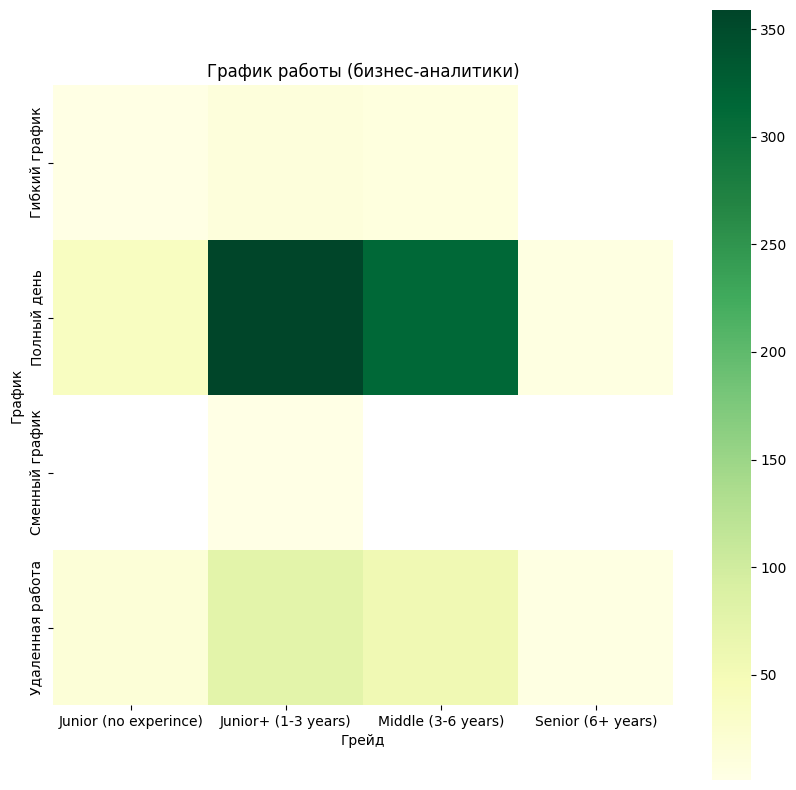

In [ ]:
plt.subplots(figsize=(10, 10))
ba_schedule = pd.DataFrame({
    x_label: grp['schedule'].value_counts()
    for x_label, grp in ba.groupby('experience')})

plt.title('График работы (бизнес-аналитики)')
sns.heatmap(ba_schedule, square=True, cmap ="YlGn")
plt.xlabel('Грейд')
_ = plt.ylabel('График')


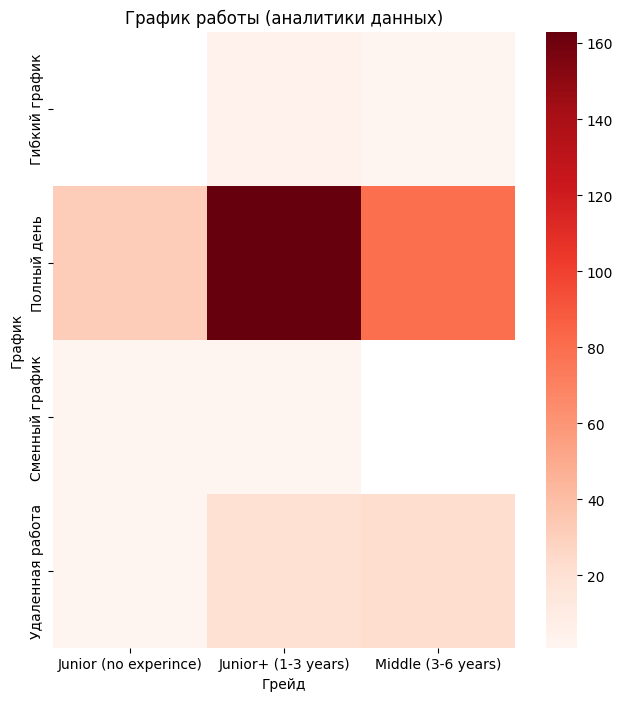

In [ ]:
plt.subplots(figsize=(8, 8))
da_schedule = pd.DataFrame({
    x_label: grp['schedule'].value_counts()
    for x_label, grp in da.groupby('experience')})
plt.title('График работы (аналитики данных)')
sns.heatmap(da_schedule, square=True, cmap = "Reds")
plt.xlabel('Грейд')
_ = plt.ylabel('График')

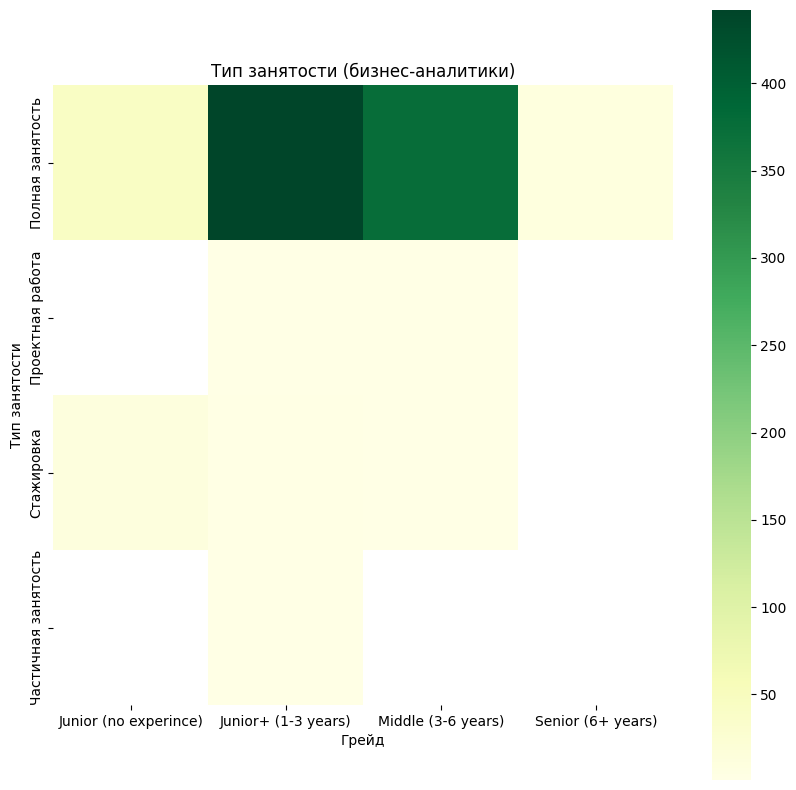

In [ ]:
plt.subplots(figsize=(10, 10))
ba_employment = pd.DataFrame({
    x_label: grp['employment'].value_counts()
    for x_label, grp in ba.groupby('experience')})
plt.title('Тип занятости (бизнес-аналитики)')
sns.heatmap(ba_employment, square=True, cmap ="YlGn")
plt.xlabel('Грейд')
_ = plt.ylabel('Тип занятости')

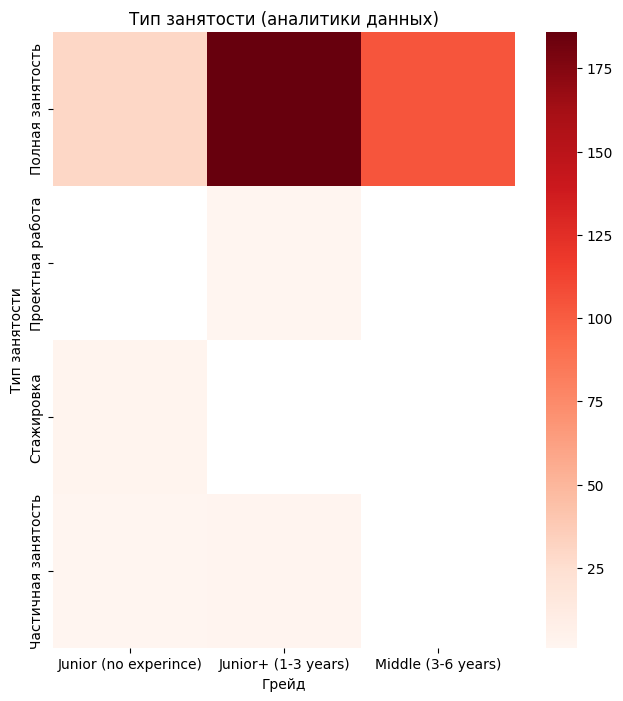

In [ ]:
plt.subplots(figsize=(8, 8))
da_employment = pd.DataFrame({
    x_label: grp['employment'].value_counts()
    for x_label, grp in da.groupby('experience')})
plt.title('Тип занятости (аналитики данных)')
sns.heatmap(da_employment, square=True, cmap ="Reds")
plt.xlabel('Грейд')
_ = plt.ylabel('Тип занятости')

Везде предпочтение отдается работе в офисе с полной занятостью, хотя варианты с удаленной рабтой также предлагаются.

<a id="findings"></a>
**Выводы**

1. Потенциальных работодателей бизнес- и дата-аналитиков больше всего интересуют джун+ и миддлы. Видимо, вакансии сеньоров закрываются другими путями.
2. В сравнении для бизнес-аналитиков бОльшую роль играют софт-скиллы или смешанные навыки (аналитическое мышление, оптимизация бизнес-процессов, постановка задач разработчикам), а для аналитиков данных - хард-скиллы и смешанные (SQL, Python, MS Excel, Power BI, работа с базами данных, работа с большим объемом информации). Это объясняется большей ориентированностью бизнес-аналитиков на коммуникацию внутри организации и более тезнической ролью аналитиков данных.
3. Основной объем вакансий по обеим специальностям открывается в Москве, Спб и городах-миллионниках.
4. Среди работодателей лидирует Сбербанк, что говорит о расширении соответствующих направлений работы банка. Бизнес-аналитиками интересуются также другие банки (ВТБ, Совком), аналитиками данных - маркетплейсы (Ozon, Wildberries), обеими специальностями  - операторы связи (Мегафон, МТС, Tele2).
5. Предпочтения по виду занятости и графику работы схожи - работодатели в основном предлагают полную занятость в офисе.

**Рекомендации**

1. Данные HH.ru по отдельным направлениям (в данном случае, бизнес-аналитикам и аналитикам данных) подлежат очистке, т.к. в них присутствуют вакансии по нерелевантным профессиям.
2. Агентству нужно обращать внимание не только на наличие у соискателя соответствующих вакансии навыков, но и на их суть (софт / хард / смешанные).
3. Существующие тренды в отраслевой специализации (банки / маркетплейсы / связь) также важны для успешного подбора вакансии.

<a id="slidedeck"></a>
**Презентация**  

Презентация к исследованию находится по ссылке: https://drive.google.com/file/d/15hVoNRNujkfZcIQHwRigUZ8ynW3-JFRD/view?usp=drivesdk